<a href="https://colab.research.google.com/github/tanuja1708/EEG-emotions/blob/main/seed7%20Bi-lstm(50%20epoch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [3]:
df = pd.read_csv('/content/de_lds_with_labels(310 seed7).csv')


In [4]:
# Separate features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encode labels and convert to categorical (7 emotions)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded, num_classes=7)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape: (samples, 62 timesteps, 5 features)
X_reshaped = X_scaled.reshape(-1, 62, 5)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_categorical, test_size=0.2, random_state=42)


In [7]:
print("X_train:", X_train)
print("y_train:", y_train)
print("X_test:", X_test)
print("y_test:", y_test)


X_train: [[[-5.25335890e-01 -1.13558441e-01 -6.01969765e-01 -6.93762679e-01
   -9.37385090e-01]
  [-1.27151918e-01 -7.80063904e-01 -7.78566873e-01 -9.72558449e-01
   -6.08941019e-01]
  [-9.41029707e-01 -1.08727783e+00 -9.32703446e-01  3.48211732e-01
   -7.34879997e-01]
  ...
  [-2.65208408e-01 -5.95674722e-01 -5.35499702e-01 -4.97117423e-01
   -4.85020813e-01]
  [-3.07723147e-01  5.37116576e-02 -3.19041382e-01 -5.53103264e-01
   -3.21823876e-01]
  [-5.52184148e-01 -7.86830502e-02 -3.73032248e-01 -2.62519742e-01
   -5.82220885e-01]]

 [[-4.10097474e-01 -4.89700688e-01 -4.62651967e-01 -5.77200564e-01
   -6.56969276e-01]
  [ 3.77644575e-01  5.18028900e-02 -5.77986098e-01 -7.86327808e-01
   -1.17387685e+00]
  [-4.34240270e-01 -8.32945697e-01 -3.89646078e-01 -3.79781967e-01
    2.17926556e-01]
  ...
  [ 6.41340280e-01  6.47320871e-01  3.00174051e-01  1.87014616e+00
    1.32113662e+00]
  [ 1.05990264e+00  2.91849012e-01  2.07022213e-01  1.17676096e+00
    1.04865281e+00]
  [ 1.46348405e+00  

In [8]:
batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(62, 5)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')  # 7 emotions
])


In [10]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=test_dataset
)


Epoch 1/50
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.2962 - loss: 1.7428 - val_accuracy: 0.5872 - val_loss: 1.1014
Epoch 2/50
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.7077 - loss: 0.8295 - val_accuracy: 0.9019 - val_loss: 0.3354
Epoch 3/50
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9308 - loss: 0.2400 - val_accuracy: 0.9579 - val_loss: 0.1495
Epoch 4/50
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9569 - loss: 0.1449 - val_accuracy: 0.9992 - val_loss: 0.0154
Epoch 5/50
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9755 - loss: 0.0854 - val_accuracy: 0.9996 - val_loss: 0.0068
Epoch 6/50
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9744 - loss: 0.0889 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 7/50
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/50
1744/1744 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 1.0000 -

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}")


Test Accuracy: 100.00


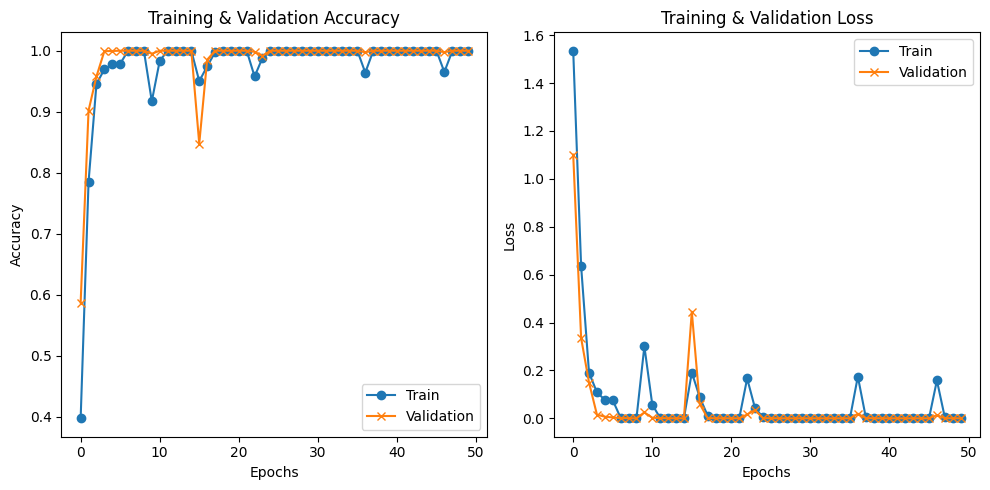

In [15]:
history_dict = history.history
acc, val_acc = history_dict['accuracy'], history_dict['val_accuracy']
loss, val_loss = history_dict['loss'], history_dict['val_loss']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(acc, marker='o')
plt.plot(val_acc, marker='x')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(loss, marker='o')
plt.plot(val_loss, marker='x')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()


In [16]:
# Predict on test data
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
print("Classification Report:\n")
print(classification_report(y_true_classes, y_pred_classes, target_names=le.classes_))


436/436 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Classification Report:

              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00      2235
     Disgust       1.00      1.00      1.00      1856
        Fear       1.00      1.00      1.00      2264
       Happy       1.00      1.00      1.00      1604
     Neutral       1.00      1.00      1.00      1322
         Sad       1.00      1.00      1.00      2438
    Surprise       1.00      1.00      1.00      2230

    accuracy                           1.00     13949
   macro avg       1.00      1.00      1.00     13949
weighted avg       1.00      1.00      1.00     13949



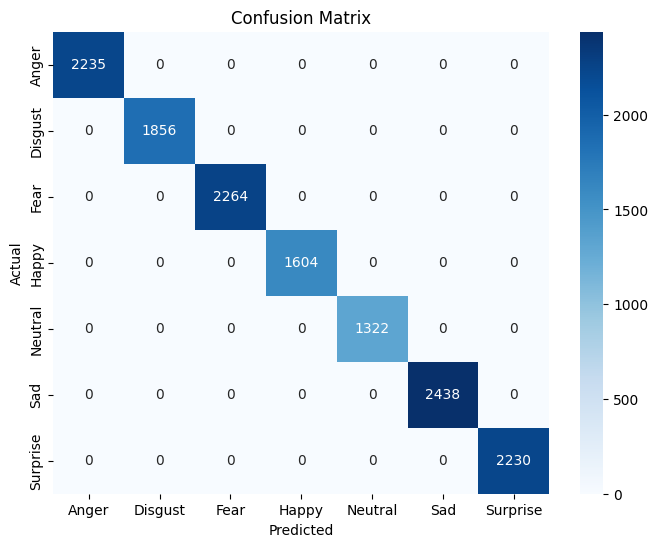

In [17]:
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [18]:
model.save("eeg_emotion_bilstm_model.h5")
print("Model saved successfully!")


Model saved successfully!


In [20]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 62, 128)        │        35,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245,015 (957.09 KB)

 Trainable params: 81,671 (319.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 163,344 (638.07 KB)

In [21]:
loaded_model = tf.keras.models.load_model("eeg_emotion_bilstm_model.h5")


In [22]:
loaded_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)


In [23]:
loss, acc = loaded_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:666: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Test Accuracy: 100.00%


In [26]:
# Predict on the dataset (or use a specific sample)
predictions = model.predict(X_reshaped)

# Convert logits to predicted class labels
predicted_classes = np.argmax(predictions, axis=1)

# For demonstration, print the first 10 predictions and their corresponding true labels
true_classes = np.argmax(y_categorical, axis=1)

print("Predicted classes: ", predicted_classes[:10])  # First 10 predictions
print("True classes:     ", true_classes[:10])      # First 10 actual classes


2180/2180 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step
Predicted classes:  [3 3 3 3 3 3 3 3 3 3]
True classes:      [3 3 3 3 3 3 3 3 3 3]


In [41]:
import random

# Select a random row from the dataset (X_test or the whole dataset)
random_idx = random.randint(0, len(X_test) - 1)
random_row = X_test[random_idx].reshape(1, 62, 5)  # Reshape to match model input shape

# Make a prediction
pred_probs = model.predict(random_row)
pred_class = np.argmax(pred_probs, axis=1)

# Decode the predicted class to emotion label
predicted_emotion = le.classes_[pred_class][0]

# Print the results
print(f"Random Row Index: {random_idx}")
print(f"Predicted Emotion: {predicted_emotion}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Random Row Index: 2480
Predicted Emotion: Surprise
